In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
data_dir="/content/drive/MyDrive/ML/ML_df.csv"
green_df= pd.read_csv(data_dir)
green_df

,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,rate_type_Nassau or Westchester,rate_type_Negotiated fare,rate_type_Newark,rate_type_Standard rate,trip_type_Street-hail,refund_neg_duplicated_True,trip_class,trip_duration,Day,Hour
0,225,220,1,0.00,2.5,0.5,999.0,0.00,0.0,0.3,...,0,0,0,1,1,0,low,22.0,1,0
1,43,43,1,0.81,4.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,low,187.0,1,1
2,79,61,1,4.97,18.0,0.5,0.5,3.86,0.0,0.3,...,0,0,0,1,1,0,medium,1139.0,1,0
3,160,189,1,0.83,5.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,low,242.0,1,1
4,112,117,1,4.99,16.0,0.5,0.5,2.00,0.0,0.3,...,0,0,0,1,1,0,medium,999.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913212,37,164,1,1.39,8.0,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,low,595.0,31,23
913213,139,108,1,2.51,11.0,0.5,0.5,1.70,0.0,0.3,...,0,0,0,1,1,0,low,814.0,31,23
913214,105,138,1,1.00,6.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,low,367.0,31,0
913215,105,21,1,2.18,10.0,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,low,637.0,31,23


In [ ]:
green_Logistic=green_df.drop(['trip_class'],axis=1)
green_Logistic

,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,rate_type_JFK,rate_type_Nassau or Westchester,rate_type_Negotiated fare,rate_type_Newark,rate_type_Standard rate,trip_type_Street-hail,refund_neg_duplicated_True,trip_duration,Day,Hour
0,225,220,1,0.00,2.5,0.5,999.0,0.00,0.0,0.3,...,0,0,0,0,1,1,0,22.0,1,0
1,43,43,1,0.81,4.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,0,1,1,0,187.0,1,1
2,79,61,1,4.97,18.0,0.5,0.5,3.86,0.0,0.3,...,0,0,0,0,1,1,0,1139.0,1,0
3,160,189,1,0.83,5.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,0,1,1,0,242.0,1,1
4,112,117,1,4.99,16.0,0.5,0.5,2.00,0.0,0.3,...,0,0,0,0,1,1,0,999.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913212,37,164,1,1.39,8.0,0.5,0.5,0.00,0.0,0.3,...,0,0,0,0,1,1,0,595.0,31,23
913213,139,108,1,2.51,11.0,0.5,0.5,1.70,0.0,0.3,...,0,0,0,0,1,1,0,814.0,31,23
913214,105,138,1,1.00,6.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,0,1,1,0,367.0,31,0
913215,105,21,1,2.18,10.0,0.5,0.5,0.00,0.0,0.3,...,0,0,0,0,1,1,0,637.0,31,23


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

# Shuffle the dataset
X=green_Logistic
y=green_df['trip_class']
X_shuffle, y_shuffle = shuffle(X, y, random_state=42)

# Define the sizes for train, cross-validation, and test sets
train_size = 0.7
cv_size = 0.15
test_size = 0.15

# Split the shuffled dataset into train, cross-validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_shuffle, y_shuffle, train_size=train_size, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (test_size + cv_size), random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the cross-validation set
y_cv_pred = model.predict(X_cv)

# Calculate the accuracy on the cross-validation set
accuracy_cv = accuracy_score(y_cv, y_cv_pred)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate the accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy on Cross-validation Set: {accuracy_cv}")
print(f"Accuracy on Test Set: {accuracy_test}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on Cross-validation Set: 0.8417467860975449
Accuracy on Test Set: 0.8394326303263908


In [ ]:
# The original dataset was divided to 3 parts; 70% train set, 15% CV set and 15% test set.
# From the above observations, we can notice that the accuracy of logistic regression on the CV set = 84.17467860975449 %
# and the accuracy of logistic regression on the test set = 83.94326303263908 %

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


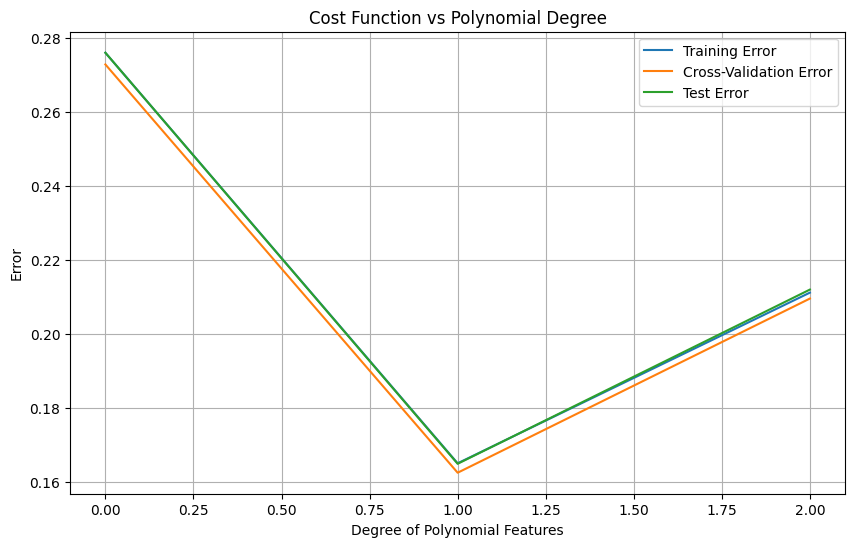

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle

# Shuffle the dataset
X=green_Logistic
y=green_df['trip_class']
X_shuffle, y_shuffle = shuffle(X, y, random_state=42)

# Define the sizes for train, cross-validation, and test sets
train_size = 0.7
cv_size = 0.15
test_size = 0.15

# Split the shuffled dataset into train, cross-validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_shuffle, y_shuffle, train_size=train_size, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (test_size + cv_size), random_state=42)

# Initialize lists to store results
degrees = [0,1,2]  # Degrees of polynomial features from 0 to 6 with step 0.1
train_errors = []
cv_errors = []
test_errors=[]

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_cv_poly = poly.transform(X_cv)
    X_test_poly = poly.transform(X_test)

    # Initialize and train the Logistic Regression model
    model = LogisticRegression()
    model.fit(X_train_poly, y_train)

    # Make predictions on the training and cross-validation sets
    y_train_pred = model.predict(X_train_poly)
    y_cv_pred = model.predict(X_cv_poly)
    # Make predictions on the test set
    y_test_pred = model.predict(X_test_poly)

    # Calculate the training and cross-validation errors
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    cv_error = 1 - accuracy_score(y_cv, y_cv_pred)
    test_error=1- accuracy_score(y_test, y_test_pred)


    train_errors.append(train_error)
    cv_errors.append(cv_error)
    test_errors.append(test_error)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error')
plt.plot(degrees, cv_errors, label='Cross-Validation Error')
plt.plot(degrees, test_errors, label='Test Error')
plt.xlabel('Degree of Polynomial Features')
plt.ylabel('Error')
plt.title('Cost Function vs Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# This plot show on the y-axis 'Error' and on the x-axis 'Degree of Polynomial Features'
# From the above graph, we can notice that the best degree of polynomial is 1 because it has the least error.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

# Shuffle the dataset
X=green_Logistic
y=green_df['trip_class']
X_shuffle, y_shuffle = shuffle(X, y, random_state=42)

# Define the sizes for train, cross-validation, and test sets
train_size = 0.7
cv_size = 0.15
test_size = 0.15

# Split the shuffled dataset into train, cross-validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_shuffle, y_shuffle, train_size=train_size, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (test_size + cv_size), random_state=42)

poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_cv_poly = poly.transform(X_cv)
X_test_poly = poly.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the training and cross-validation sets
y_train_pred = model.predict(X_train_poly)
y_cv_pred = model.predict(X_cv_poly)
y_test_pred = model.predict(X_test_poly)

# Calculate the training and cross-validation errors
train_error = 1 - accuracy_score(y_train, y_train_pred)
cv_error = 1 - accuracy_score(y_cv, y_cv_pred)
test_error = 1 - accuracy_score(y_test, y_test_pred)


print(f"Error on Cross-validation Set: {cv_error}")
print(f"Error on Test Set: {test_error}")

# Assuming 'model' is your trained logistic regression model

# Coefficients and Intercept
coefficients = model.coef_
intercept = model.intercept_

# Model Parameters
penalty = model.penalty
regularization_strength = model.C
solver = model.solver
max_iter = model.max_iter

# Model Performance Metrics
y_pred = model.predict(X_test_poly)  # Assuming X_test is your test data
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#printing function for each class to know the coeffient for each feature
print("Coefficients:", coefficients)

#printing the final weight for each class and to now the weight of each feature will be the intercept * coiffent
print("Intercept:", intercept)

#Type of Regulariation which is between L1 and L2
print("Penalty:", penalty)

#Lamda that use to consider the weight of each feature and it is equal = 1 which means applying a moderate amount of regularization
print("Regularization Strength:", regularization_strength)

#The maximum number of iterations allowed for the solver to converge and fit the model
print("Maximum Iterations:", max_iter)

# The accuracy of the model on the test set. It represents the proportion of correctly predicted instances out of all instances in the test set.
print("Accuracy:", accuracy)

print("Confusion Matrix:\n", conf_matrix)
#Precision is the ratio of correctly predicted positive observations to the total predicted positives for each class (TP)/(TP+FP).
#Accuracy It measures the overall performance of the model.
#Recall (TP+FN)/(Total) among all
#F1score harmonic mean of precision and recall if precison is high so F1score will be high
#Support is the number of actual occurrences of the class in the specified dataset
#Precision is 0.31, indicating that 31% of the predicted "high" instances were correctly classified.
#Recall is 0.09, indicating that only 9% of the actual "high" instances were correctly classified.
print("Classification Report:\n", class_report)


Error on Cross-validation Set: 0.16238511348123486
Error on Test Set: 0.16480147171546833
Coefficients: [[-1.79555994e-03 -2.43600733e-02  2.70877473e-03 -2.21243926e-03
   2.48568016e-02  7.84642834e-02 -3.92603797e-04  5.89382258e-03
   1.02553898e-02  4.89987555e-03 -5.47972157e-04 -5.61542442e-03
  -5.41312524e-03  1.86973645e-04  2.56102069e-05  5.78722594e-05
   2.68357425e-05 -2.09269645e-03 -1.83541144e-03 -2.30622354e-05
   1.32878848e-05 -2.40899604e-02 -2.42932698e-02]
 [ 3.51302323e-03  1.39580205e-02  7.43771826e-03  4.15662845e-03
  -5.53002966e-02 -1.70642280e-01 -6.59745189e-04 -1.03482333e-03
  -2.43953527e-02 -5.40427370e-03  1.00944099e-03  8.90108122e-03
   9.63553725e-03 -9.19257396e-05 -1.82864983e-05  8.08075676e-05
  -2.58435616e-05  3.56759974e-03  3.41117370e-03  8.45768092e-05
   1.91342824e-07  3.94281076e-02  4.71150947e-02]
 [-1.71746329e-03  1.04020528e-02 -1.01464930e-02 -1.94418919e-03
   3.04434950e-02  9.21779968e-02  1.05234899e-03 -4.85899925e-03
  

In [ ]:
# The accuracy indicates that 83.52% of the instances were correctly classified by the model.
# Class 0 (High):
# False Negatives: 4771 (predicted as "medium")
# True Positives: 462
# Class 1 (Low):
# True Positives: 92,013
# False Positives: 207 (predicted as "high")
# False Negatives: 6949 (predicted as "medium")
# Class 2 (Medium):
# True Positives: 21,933
# False Positives: 9842 (predicted as "low")
# False Negatives: 806 (predicted as "high")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

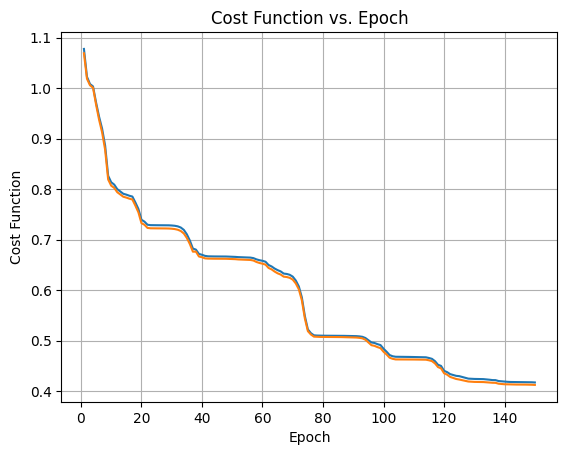

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle
from sklearn.metrics import log_loss

# Shuffle the dataset
X = green_df.drop(['trip_class'], axis=1)
y = green_df['trip_class']
X_shuffle, y_shuffle = shuffle(X, y, random_state=42)

# Define the sizes for train, cross-validation, and test sets
train_size = 0.7
cv_size = 0.15
test_size = 0.15

# Split the shuffled dataset into train, cross-validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_shuffle, y_shuffle, train_size=train_size, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (test_size + cv_size), random_state=42)

# poly = PolynomialFeatures(degree=1)
# X_train_poly = poly.fit_transform(X_train)
# X_cv_poly = poly.transform(X_cv)
# X_test_poly = poly.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression()

num_iterations=150

cost_values = []
cost_values_cv = []

# Train the model and record the loss after each epoch
for epoch in range(1,num_iterations+1):
    model.max_iter = epoch
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_train)
    y_pred_proba_cv = model.predict_proba(X_cv)
    loss = log_loss(y_train, y_pred_proba)
    loss_cv = log_loss(y_cv, y_pred_proba_cv)
    cost_values.append(loss)
    cost_values_cv.append(loss_cv)

# Plotting cost function vs. epoch
plt.plot(range(1, num_iterations + 1), cost_values)
plt.plot(range(1, num_iterations + 1), cost_values_cv)
plt.xlabel('Epoch')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Epoch')
plt.grid(True)
plt.show()

In [ ]:
# From the above graph, we estimated that the max number of iterations = 120, using the elbow method.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

model.max_iter = 120
model.fit(X_train, y_train)
# Make predictions on the training and cross-validation sets
y_train_pred = model.predict(X_train)
y_cv_pred = model.predict(X_cv)
y_test_pred = model.predict(X_test)

# Calculate the training and cross-validation errors
train_error = 1 - accuracy_score(y_train, y_train_pred)
cv_error = 1 - accuracy_score(y_cv, y_cv_pred)
test_error = 1 - accuracy_score(y_test, y_test_pred)


print(f"Error on Cross-validation Set: {cv_error}")
print(f"Error on Test Set: {test_error}")

# Assuming 'model' is your trained logistic regression model

# Coefficients and Intercept
coefficients = model.coef_
intercept = model.intercept_

# Model Parameters
penalty = model.penalty
regularization_strength = model.C
solver = model.solver
max_iter = model.max_iter

# Model Performance Metrics
y_pred = model.predict(X_test)  # Assuming X_test is your test data
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
#Coefficient matrix is the weight for each attribute, 3 tuples for multi-class one for each class (0 or 1)
print("Coefficients:", coefficients)
#weight of each class function
print("Intercept:", intercept)
# penalty term proportional to the square of the magnitude of the coefficients
print("Penalty:", penalty)
#When C=1.0 (or any positive value), it indicates a moderate level of regularization strength.
#The model will balance between fitting the training data closely and avoiding overfitting by penalizing large
#coefficients
print("Regularization Strength:", regularization_strength)
#specifies the optimization algorithm to use when fitting the logistic regression model.
#LBFGS Solver (Limited-memory Broyden–Fletcher–Goldfarb–Shanno)
print("Solver:", solver)
#In iterative optimization algorithms like those used in logistic regression, the algorithm updates the model parameters
# (coefficients) iteratively to minimize the objective function (e.g., negative log-likelihood in logistic regression).
#The max_iter parameter sets an upper limit on the number of iterations the algorithm can perform.
#If the algorithm doesn't converge (i.e., reach a satisfactory solution) within this maximum number of iterations,
#it stops and returns the current solution.
print("Maximum Iterations:", max_iter)
#test accuracy
print("Accuracy:", accuracy)

print("Confusion Matrix:\n", conf_matrix)
#Precision measures the proportion of correctly predicted positive instances (true positives)
#among all instances predicted as positive (true positives + false positives).
#Recall measures the proportion of correctly predicted positive instances (true positives)
#among all actual positive instances (true positives + false negatives).
#F1-score is calculated as 2 * (precision * recall) / (precision + recall).
#It ranges from 0 to 1, where a higher F1-score indicates better balance between precision and recall.
#Support represents the number of actual instances in each class. It's the number of instances that belong to each class in your dataset.
#Macro average calculates the average of precision, recall,
#and F1-score across all classes without considering class imbalance
#Weighted average calculates the average of precision, recall, and F1-score across all classes,
#considering class imbalance by weighting each class's score by its support (number of instances)

print("Classification Report:\n", class_report)

Error on Cross-validation Set: 0.15328909426717185
Error on Test Set: 0.15345699831365933
Coefficients: [[-3.02643007e-02  5.99884670e-03 -2.91536158e-03  3.33793628e-02
   1.05494071e-01 -5.04606773e-04  1.35066205e-03  1.38059729e-02
   6.57478025e-03 -7.23341773e-04 -7.39311632e-03 -7.11799993e-03
   2.51226638e-04  3.28469299e-05  7.73159086e-05  3.58752063e-05
  -2.76660788e-03 -2.42278674e-03 -3.05463784e-05  1.27333464e-05
  -3.16146906e-02 -3.20137040e-02]
 [ 2.29418712e-02  1.13001624e-03  5.56663747e-03 -7.41072937e-02
  -2.28675709e-01 -8.92344323e-04  5.37169139e-04 -3.27465517e-02
  -7.25242684e-03  1.35086947e-03  1.19041595e-02  1.28355503e-02
  -1.24163368e-04 -2.43299080e-05  1.11011208e-04 -3.46865973e-05
   4.77541392e-03  4.56498913e-03  1.12981306e-04 -3.95197798e-06
   5.23519009e-02  6.27174295e-02]
 [ 7.32242955e-03 -7.12886294e-03 -2.65127589e-03  4.07279310e-02
   1.23181638e-01  1.39695110e-03 -1.88783119e-03  1.89405788e-02
   6.77646591e-04 -6.27527693e-04 

In [ ]:
# accuracy indicates that the model correctly predicts the class of the instances 84.7% of the time, which is generally a good level of accuracy.

#confusion matrix:
#Class 'high' (5233 instances):
#True Positives (TP): 277 instances correctly classified as 'high'.
#False Negatives (FN): 4956 instances misclassified as other classes (0 as 'low' and 4956 as 'medium').
#Class 'low' (99169 instances):
#True Positives (TP): 89579 instances correctly classified as 'low'.
#False Negatives (FN): 11590 instances misclassified as other classes (376 as 'high' and 9214 as 'medium').
#Class 'medium' (32581 instances):
#True Positives (TP): 26106 instances correctly classified as 'medium'.
#False Negatives (FN): 6475 instances misclassified as other classes (609 as 'high' and 5866 as 'low').

#classification report:
#Class 'high':
#Precision: 0.22
#Only 22% of the instances predicted as 'high' are actually 'high'.
#Recall: 0.05
#Only 5% of the actual 'high' instances are correctly identified.
#F1-Score: 0.09
#The harmonic mean of precision and recall is very low, indicating poor performance for this class.

#Class 'low':
#Precision: 0.94
#94% of the instances predicted as 'low' are actually 'low'.
#Recall: 0.90
#90% of the actual 'low' instances are correctly identified.
#F1-Score: 0.92
#Indicates strong performance for this class.

#Class 'medium':
#Precision: 0.65
#65% of the instances predicted as 'medium' are actually 'medium'.
#Recall: 0.80
#80% of the actual 'medium' instances are correctly identified.
#F1-Score: 0.72
#Indicates moderate performance for this class.

